1. **Gather and prepare data:** Load the dataset into a pandas DataFrame and perform any necessary data cleaning, preprocessing, and feature engineering.

In [120]:
import pandas as pd
# Loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('dataset.csv')
type(loan_dataset)

pandas.core.frame.DataFrame

In [121]:
# Number of rows and columns
loan_dataset.shape

(614, 13)

In [122]:
# Printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [123]:
# Number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [124]:
# Dropping the missing values
loan_dataset = loan_dataset.dropna()

In [125]:
# Number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [126]:
# Statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [127]:
# Label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [128]:
# Printing the first 5 rows of the dataframe
loan_dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,1
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,1


In [129]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [130]:
# Replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [131]:
# Dependent values
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [132]:
import seaborn as sns

<Axes: xlabel='Education', ylabel='count'>

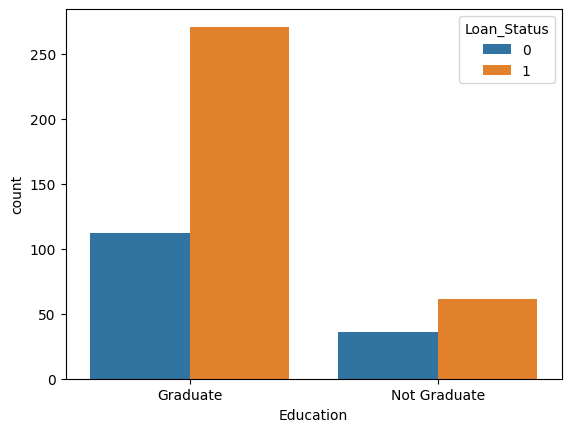

In [133]:
# Education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

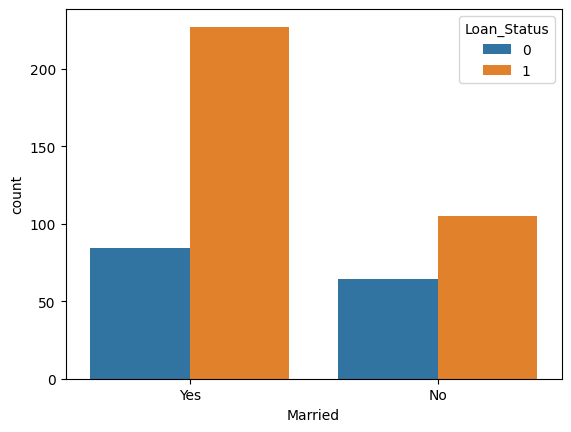

In [134]:
# Marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [135]:
# Convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [136]:
# Printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [137]:
# Separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [138]:
print(X)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [139]:
print(Y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


**2. Split the data:** Split the dataset into training and testing sets using the train_test_split function from scikit-learn.

In [140]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=2)

In [141]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (336, 11) (144, 11)


**3. Selecting models**

In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Create an instance of the decision tree classifier
dtc = DecisionTreeClassifier(max_depth=10, min_samples_split=10)
# Create an instance of the random forest classifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10)

**4. Train the model:** Fit the Random Forest classifier to the training data using the fit method.

In [143]:
# Train the decision tree classifier on the training data
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=10)

In [144]:
# Train the random forest classifier on the training data
rfc.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10)

**5. Evaluate the model:** Use the trained decision tree classifier to make predictions on the testing data and evaluate the performance of the model using classification metrics such as accuracy, precision, recall, and F1 score.

In [145]:
from sklearn.metrics import classification_report
# Evaluation report on training data
X_train_prediction = dtc.predict(X_train)
training_data_report = classification_report(Y_train, X_train_prediction, digits=2)
print("Training Data Report (Decision Tree Classification):", training_data_report, sep="\n")
# Evaluation report on testing data
X_test_prediction = dtc.predict(X_test)
testing_data_report = classification_report(Y_test, X_test_prediction, digits=2)
print("\nTraining Data Report (Decision Tree Classification):", testing_data_report, sep="\n")

Training Data Report (Decision Tree Classification):
              precision    recall  f1-score   support

           0       0.88      0.76      0.81       104
           1       0.90      0.95      0.92       232

    accuracy                           0.89       336
   macro avg       0.89      0.86      0.87       336
weighted avg       0.89      0.89      0.89       336


Training Data Report (Decision Tree Classification):
              precision    recall  f1-score   support

           0       0.48      0.50      0.49        44
           1       0.78      0.76      0.77       100

    accuracy                           0.68       144
   macro avg       0.63      0.63      0.63       144
weighted avg       0.68      0.68      0.68       144



In [146]:
# Evaluation report on training data
X_train_prediction = rfc.predict(X_train)
training_data_report = classification_report(Y_train, X_train_prediction, digits=2)
print("Training Data Report (Random Forest Classification):", training_data_report, sep="\n")
# Evaluation report on testing data
X_test_prediction = rfc.predict(X_test)
testing_data_report = classification_report(Y_test, X_test_prediction, digits=2)
print("\nTraining Data Report (Random Forest Classification):", testing_data_report, sep="\n")

Training Data Report (Random Forest Classification):
              precision    recall  f1-score   support

           0       0.94      0.62      0.75       104
           1       0.85      0.98      0.91       232

    accuracy                           0.87       336
   macro avg       0.90      0.80      0.83       336
weighted avg       0.88      0.87      0.86       336


Training Data Report (Random Forest Classification):
              precision    recall  f1-score   support

           0       0.82      0.52      0.64        44
           1       0.82      0.95      0.88       100

    accuracy                           0.82       144
   macro avg       0.82      0.74      0.76       144
weighted avg       0.82      0.82      0.81       144



In [147]:
# Displaying Graphs
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

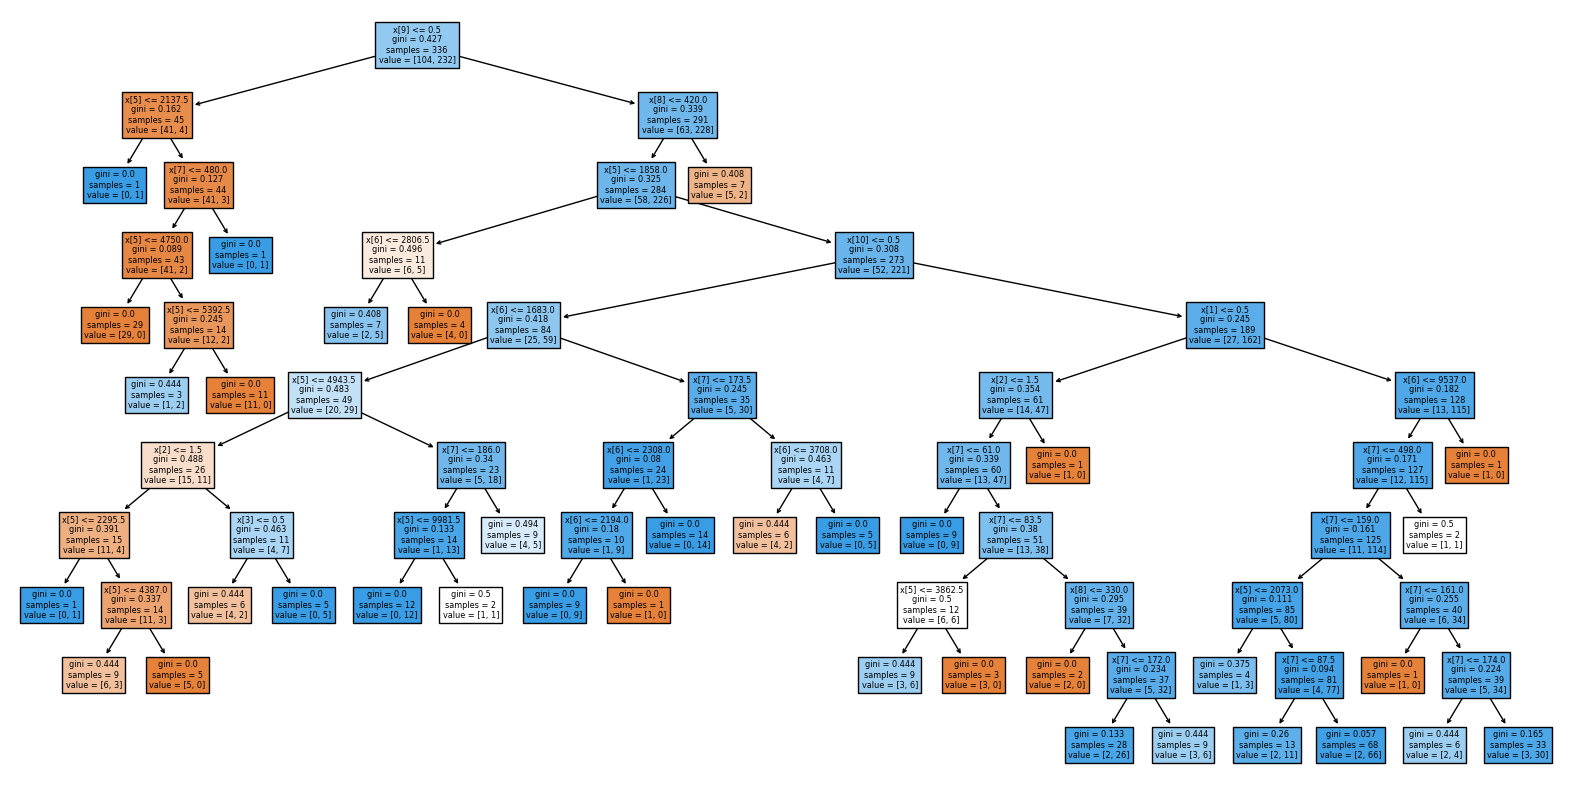

In [148]:
# Decision Tree Classification Graph
plt.figure(figsize=(20,10))
plot_tree(dtc, filled=True)
plt.show()

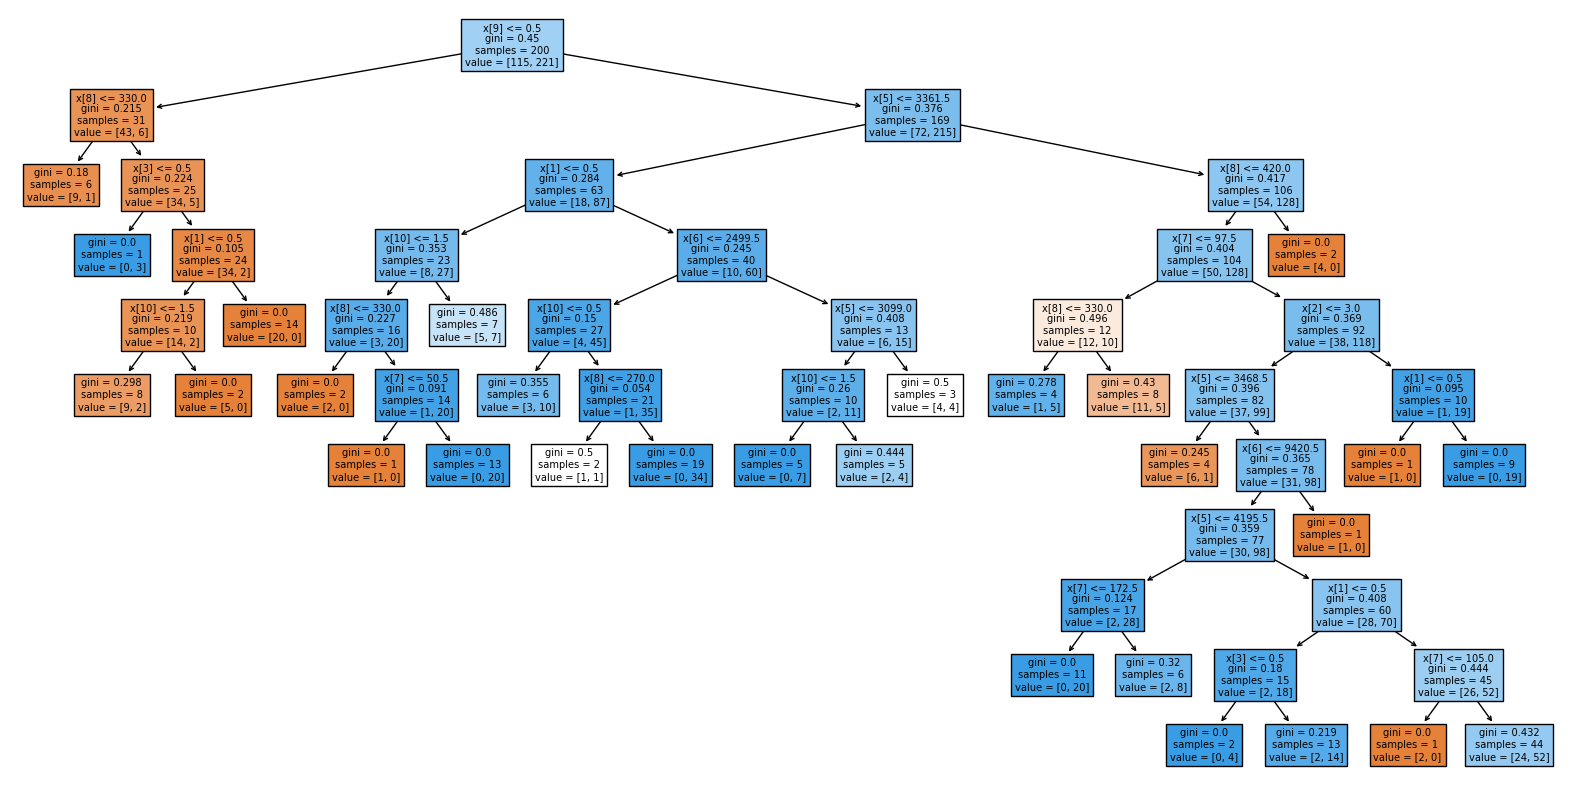

In [149]:
# Random Forest Classification Graph
plt.figure(figsize=(20,10))
plot_tree(rfc.estimators_[0], filled=True)
plt.show()

**6. Make predictions**

In [150]:
# Load the new data into a pandas DataFrame
predict_data = pd.read_csv('predict.csv')
type(predict_data)

pandas.core.frame.DataFrame

In [151]:
# Number of rows and columns
predict_data.shape

(4, 13)

In [152]:
# Convert categorical columns to numerical values
predict_data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [153]:
# Separating the data and label
X = predict_data.drop(columns=['Loan_ID','Loan_Status'],axis=1)

In [154]:
# Printing the dataframe
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,3,1,1,4583,2359,1332,360,1,1
1,1,1,2,0,0,2200,2383,435,360,0,2
2,1,0,0,1,0,1953,3489,5000,120,0,2
3,0,0,0,0,1,0,800,375,60,1,1


In [155]:
# Making predictions using the trained decision tree classifier
new_predictions = rfc.predict(X)

In [156]:
print(new_predictions)

[1 0 0 0]
